# 1. Install Dependencies and Setup

In [10]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
pre = Precision()
re = Recall()
acc = BinaryAccuracy()



In [13]:
data_dir = '../P4/train'

birds = (os.listdir(data_dir))
print(birds)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

# 3. Load Data

In [4]:
#########
train = tf.keras.utils.image_dataset_from_directory('../P4/train', label_mode='categorical', labels='inferred')

val = tf.keras.utils.image_dataset_from_directory('../P4/valid', label_mode='categorical', labels='inferred')

test = tf.keras.utils.image_dataset_from_directory('../P4/test', label_mode='categorical', labels='inferred')


Found 18748 files belonging to 118 classes.
Found 590 files belonging to 118 classes.
Found 590 files belonging to 118 classes.


# 4. Scale Data

In [9]:
train = train.map(lambda x,y: (x/255, y))
val = val.map(lambda x,y: (x/255, y))
test = test.map(lambda x,y: (x/255, y))


# Define data augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])


train = train.map(lambda x, y: (data_augmentation(x), y))


# 6. Build Deep Learning Model

In [16]:

model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))  # Add dropout here
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))  # Add dropout here
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))  # Add dropout here
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout before the output layer
model.add(Dense(len(birds), activation='softmax'))

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 118)            │        30,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,726,694 (14.22 MB)

 Trainable params: 3,726,694 (14.22 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [17]:
logdir='/content/drive/MyDrive/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[early_stopping])


Epoch 1/40
586/586 ━━━━━━━━━━━━━━━━━━━━ 247s 417ms/step - accuracy: 0.0149 - loss: 4.7574 - val_accuracy: 0.0695 - val_loss: 4.2606
Epoch 2/40
586/586 ━━━━━━━━━━━━━━━━━━━━ 255s 435ms/step - accuracy: 0.0501 - loss: 4.2728 - val_accuracy: 0.1559 - val_loss: 3.7569
Epoch 3/40
586/586 ━━━━━━━━━━━━━━━━━━━━ 246s 418ms/step - accuracy: 0.1162 - loss: 3.8448 - val_accuracy: 0.2593 - val_loss: 3.3244
Epoch 4/40
586/586 ━━━━━━━━━━━━━━━━━━━━ 258s 439ms/step - accuracy: 0.1571 - loss: 3.5344 - val_accuracy: 0.3136 - val_loss: 3.0253
Epoch 5/40
586/586 ━━━━━━━━━━━━━━━━━━━━ 317s 541ms/step - accuracy: 0.1918 - loss: 3.3404 - val_accuracy: 0.3424 - val_loss: 2.7638
Epoch 6/40
586/586 ━━━━━━━━━━━━━━━━━━━━ 380s 648ms/step - accuracy: 0.2142 - loss: 3.2181 - val_accuracy: 0.3678 - val_loss: 2.6250
Epoch 7/40
586/586 ━━━━━━━━━━━━━━━━━━━━ 357s 607ms/step - accuracy: 0.2431 - loss: 3.0640 - val_accuracy: 0.3898 - val_loss: 2.4853
Epoch 8/40
586/586 ━━━━━━━━━━━━━━━━━━━━ 350s 596ms/step - accuracy: 0.2537 -

# 8. Plot Performance

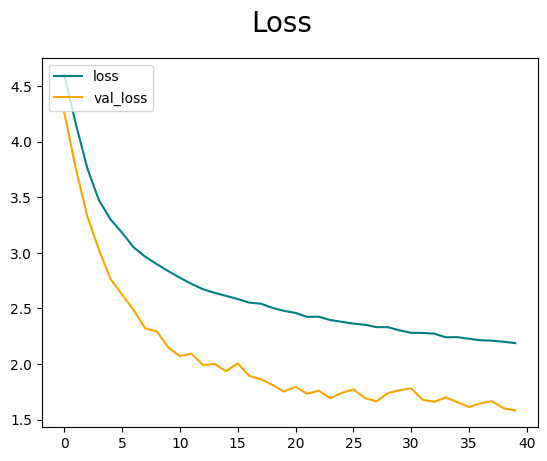

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

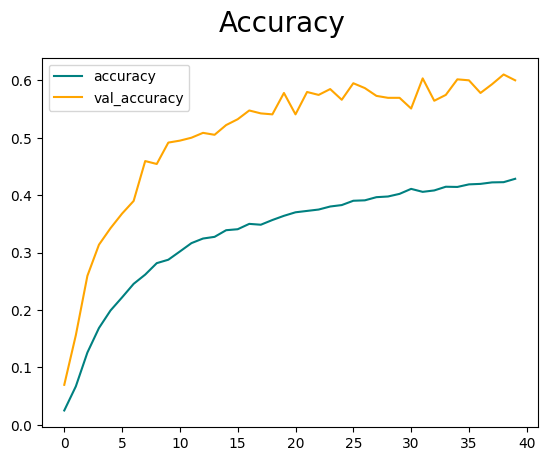

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
probabilities = model.predict_proba(X_test)

In [36]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [22]:
print(f'Precision: {pre.result()},Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 0.9146919250488281,Recall: 0.16355931758880615, Accuracy: 0.9927821159362793


# 10. Test

In [23]:

def preprocess_image(image_path, target_size=(256, 256)):
    # Read the image
    image = cv2.imread(image_path)
    # Resize the image to the target size
    image = cv2.resize(image, target_size)
    # Convert the image to float32 and normalize its pixel values to the range [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Expand the dimensions to create a batch of size 1
    image = np.expand_dims(image, axis=0)
    return image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


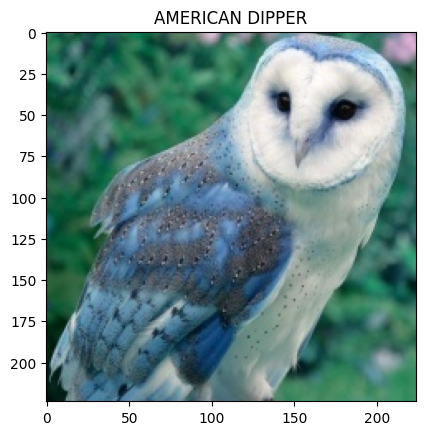

17

In [35]:


image_path = '../P4/test/BARN OWL/1.jpg'
preprocessed_image = preprocess_image(image_path)
predicted_probabilities = model.predict(preprocessed_image)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = birds[predicted_class_index]
predicted_class_index
plt.imshow(cv2.imread(image_path))
plt.title(predicted_class_name)
plt.show()
predicted_class_index

# 11. Save the Model

In [14]:
model.save(os.path.join('models','imageclassifier.h5'))

In [15]:
new_model = load_model('imageclassifierV2.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'imageclassifierV2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))